<a href="https://colab.research.google.com/github/susan291-gifs/SussieAssignment/blob/main/DeepNeuralNetwork_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from keras.datasets import mnist
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import OneHotEncoder

###Problem 1

In [ ]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
print(X_train.shape) # (60000, 28, 28)
print(X_test.shape) # (10000, 28, 28)
print(X_train[0].dtype) # uint8
print(X_train[0])

(60000, 28, 28)
(10000, 28, 28)
uint8
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0 

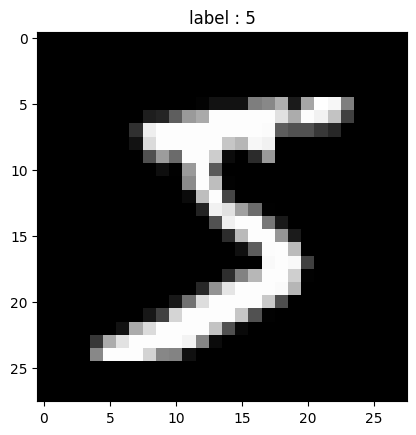

In [ ]:
%matplotlib inline
index = 0
image = X_train[index].reshape(28,28)

plt.imshow(image, 'gray')
plt.title('label : {}'.format(y_train[index]))
plt.show()

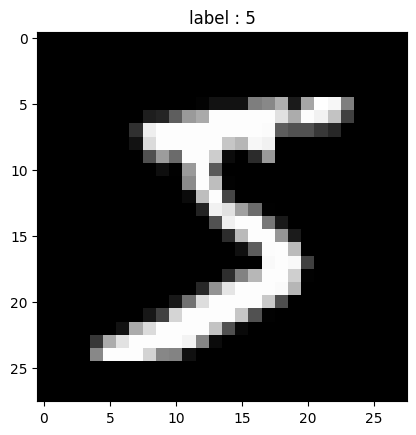

[[-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -1

In [ ]:
index = 0
image = X_train[index].reshape(28, 28)
image = image.astype(np.float64)  # Convert to float type using np.float64
image -= 105.35  # Intentionally try to create a negative decimal value

plt.imshow(image, 'gray')
plt.title('label : {}'.format(y_train[index]))
plt.show()

print(image)  # Check the value

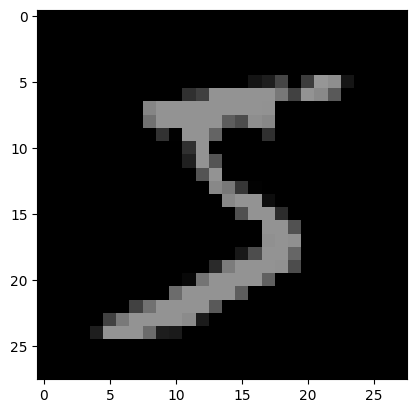

In [ ]:
plt.imshow(image, 'gray', vmin = 0, vmax = 255)

In [ ]:
X_train = X_train.astype(np.float64)
X_test = X_test.astype(np.float64)
X_train /= 255
X_test /= 255
print(X_train.max()) # 1.0
print(X_train.min()) # 0.0

1.0
0.0


In [ ]:
enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
y_train_one_hot = enc.fit_transform(y_train[:, np.newaxis])
y_test_one_hot = enc.transform(y_test[:, np.newaxis])
print(y_train.shape) # (60000,)
print(y_train_one_hot.shape) # (60000, 10)
print(y_train_one_hot.dtype) # float64

(60000,)
(60000, 10)
float64


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)
print(X_train.shape) # (48000, 784)
print(X_val.shape) # (12000, 784)

(48000, 28, 28)
(12000, 28, 28)


####Problem 1

In [ ]:
class SimpleInitializer:
    """
    Simple initializer with Gaussian distribution
    """
    def __init__(self, sigma):
        self.sigma = sigma

    def initialize(self, n_input, n_output):
        """
        Initialize weights and biases

        Parameters
        ----------
        n_input : int
            Number of input nodes
        n_output : int
            Number of output nodes

        Returns
        -------
        W : ndarray, shape (n_input, n_output)
            Initialized weights
        b : ndarray, shape (n_output,)
            Initialized biases
        """
        W = self.sigma * np.random.randn(n_input, n_output)
        b = np.zeros(n_output)
        return W, b


n_features = 784
n_nodes1 = 400
n_nodes2 = 200
n_output = 10
sigma = 0.01

initializer = SimpleInitializer(sigma)
W1, b1 = initializer.initialize(n_features, n_nodes1)
W2, b2 = initializer.initialize(n_nodes1, n_nodes2)
W3, b3 = initializer.initialize(n_nodes2, n_output)

print("W1 shape:", W1.shape)  # (784, 400)
print("b1 shape:", b1.shape)  # (400,)
print("W2 shape:", W2.shape)  # (400, 200)
print("b2 shape:", b2.shape)  # (200,)
print("W3 shape:", W3.shape)  # (200, 10)
print("b3 shape:", b3.shape)  # (10,)

W1 shape: (784, 400)
b1 shape: (400,)
W2 shape: (400, 200)
b2 shape: (200,)
W3 shape: (200, 10)
b3 shape: (10,)


###Problem 2

In [ ]:
class ScratchSimpleNeuralNetworkClassifier():
    """
    Simple three-layer neural network classifier
    """

    def __init__(self, n_features=784, n_nodes1=400, n_nodes2=200, n_output=10, sigma=0.01, verbose=True):
        self.verbose = verbose
        self.n_features = n_features
        self.n_nodes1 = n_nodes1
        self.n_nodes2 = n_nodes2
        self.n_output = n_output


        self.W1, self.B1 = self.initialize_weights(n_features, n_nodes1, sigma)
        self.W2, self.B2 = self.initialize_weights(n_nodes1, n_nodes2, sigma)
        self.W3, self.B3 = self.initialize_weights(n_nodes2, n_output, sigma)

    def initialize_weights(self, n_input, n_output, sigma):
        W = sigma * np.random.randn(n_input, n_output)
        B = np.zeros(n_output)
        return W, B

    def fit(self, X, y, X_val=None, y_val=None):
        """
        Train the neural network classifier.

        Parameters
        ----------
        X : ndarray, shape (n_samples, n_features)
            Training data features
        y : ndarray, shape (n_samples,)
            Training data labels
        X_val : ndarray, shape (n_samples, n_features)
            Validation data features
        y_val : ndarray, shape (n_samples,)
            Validation data labels
        """

        A1 = self.forward(X)
        if self.verbose:
            print(f"Forward propagation output (first layer): {A1}")

        pass

    def forward(self, X):
        """
        Perform forward propagation.

        Parameters
        ----------
        X : ndarray, shape (n_samples, n_features)
            Input data

        Returns
        -------
        Z3 : ndarray, shape (n_samples, n_output)
            Output probabilities
        """

        A1 = np.dot(X, self.W1) + self.B1
        Z1 = sigmoid(A1)


        A2 = np.dot(Z1, self.W2) + self.B2
        Z2 = sigmoid(A2)


        A3 = np.dot(Z2, self.W3) + self.B3
        Z3 = softmax(A3)

        return Z3

    def predict(self, X):
        """
        Estimate using a neural network classifier.

        Parameters
        ----------
        X : ndarray, shape (n_samples, n_features)
            Input data

        Returns
        -------
        y_pred : ndarray, shape (n_samples,)
            Predicted labels
        """
        Z3 = self.forward(X)
        y_pred = np.argmax(Z3, axis=1)
        return y_pred

In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)

###Problem 3

In [ ]:
def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t * np.log(y + delta)) / y.shape[0]

class ScratchSimpleNeuralNetworkClassifier():
    """
    Simple three-layer neural network classifier
    """

    def __init__(self, n_features=784, n_nodes1=400, n_nodes2=200, n_output=10, sigma=0.01, verbose=True):
        self.verbose = verbose
        self.n_features = n_features
        self.n_nodes1 = n_nodes1
        self.n_nodes2 = n_nodes2
        self.n_output = n_output


        self.W1, self.B1 = self.initialize_weights(n_features, n_nodes1, sigma)
        self.W2, self.B2 = self.initialize_weights(n_nodes1, n_nodes2, sigma)
        self.W3, self.B3 = self.initialize_weights(n_nodes2, n_output, sigma)

    def initialize_weights(self, n_input, n_output, sigma):
        W = sigma * np.random.randn(n_input, n_output)
        B = np.zeros(n_output)
        return W, B

    def fit(self, X, y, X_val=None, y_val=None):
        """
        Train the neural network classifier.

        Parameters
        ----------
        X : ndarray, shape (n_samples, n_features)
            Training data features
        y : ndarray, shape (n_samples,)
            Training data labels
        X_val : ndarray, shape (n_samples, n_features)
            Validation data features
        y_val : ndarray, shape (n_samples,)
            Validation data labels
        """

        pass

    def forward(self, X):
        """
        Perform forward propagation.

        Parameters
        ----------
        X : ndarray, shape (n_samples, n_features)
            Input data

        Returns
        -------
        Z3 : ndarray, shape (n_samples, n_output)
            Output probabilities
        """

        A1 = np.dot(X, self.W1) + self.B1
        Z1 = sigmoid(A1)


        A2 = np.dot(Z1, self.W2) + self.B2
        Z2 = sigmoid(A2)


        A3 = np.dot(Z2, self.W3) + self.B3
        Z3 = softmax(A3)

        return Z3

    def predict(self, X):
        """
        Estimate using a neural network classifier.

        Parameters
        ----------
        X : ndarray, shape (n_samples, n_features)
            Input data

        Returns
        -------
        y_pred : ndarray, shape (n_samples,)
            Predicted labels
        """
        Z3 = self.forward(X)
        y_pred = np.argmax(Z3, axis=1)
        return y_pred

    def compute_loss(self, y, t):
        """
        Compute the cross-entropy loss.

        Parameters
        ----------
        y : ndarray, shape (n_samples, n_output)
            Predicted probabilities
        t : ndarray, shape (n_samples, n_output)
            True labels (one-hot encoded)

        Returns
        -------
        loss : float
            Cross-entropy loss
        """
        return cross_entropy_error(y, t)



```
`# This is formatted as code`
```

###Problem 4

In [ ]:
class ThreeLayerNN:
    def __init__(self, n_features, n_nodes1, n_nodes2, n_output, initializer, optimizer):
        self.fc1 = FC(n_features, n_nodes1, initializer, optimizer)
        self.fc2 = FC(n_nodes1, n_nodes2, initializer, optimizer)
        self.fc3 = FC(n_nodes2, n_output, initializer, optimizer)

    def sigmoid(self, A):
        return 1 / (1 + np.exp(-A))

    def tanh(self, A):
        return np.tanh(A)

    def softmax(self, A):
        expA = np.exp(A)
        return expA / np.sum(expA, axis=1, keepdims=True)

    def forward(self, X):
        A1 = self.fc1.forward(X)
        Z1 = self.sigmoid(A1)

        A2 = self.fc2.forward(Z1)
        Z2 = self.tanh(A2)

        A3 = self.fc3.forward(Z2)
        Z3 = self.softmax(A3)

        return Z3
    def backward(self, X, Y, Z3):

        dL_dA3 = (Z3 - Y) / X.shape[0]
        dL_dB3 = np.sum(dL_dA3, axis=0, keepdims=True)
        dL_dW3 = np.dot(self.fc2.A.T, dL_dA3)
        dL_dZ2 = np.dot(dL_dA3, self.fc3.W.T)


        dL_dA2 = dL_dZ2 * (1 - np.tanh(self.fc2.A)**2)
        dL_dB2 = np.sum(dL_dA2, axis=0, keepdims=True)
        dL_dW2 = np.dot(self.fc1.A.T, dL_dA2)
        dL_dZ1 = np.dot(dL_dA2, self.fc2.W.T)


        dL_dA1 = dL_dZ1 * (1 - np.tanh(self.fc1.A)**2)
        dL_dB1 = np.sum(dL_dA1, axis=0, keepdims=True)
        dL_dW1 = np.dot(X.T, dL_dA1)


        self.fc1.W -= learning_rate * dL_dW1
        self.fc1.B -= learning_rate * dL_dB1
        self.fc2.W -= learning_rate * dL_dW2
        self.fc2.B -= learning_rate * dL_dB2
        self.fc3.W -= learning_rate * dL_dW3
        self.fc3.B -= learning_rate * dL_dB3


        return dL_dZ1



```
# This is formatted as code
```

###Problem 5

In [ ]:
class ThreeLayerNN:
    def __init__(self, n_features, n_nodes1, n_nodes2, n_output, initializer, optimizer):
        self.fc1 = FC(n_features, n_nodes1, initializer, optimizer)
        self.fc2 = FC(n_nodes1, n_nodes2, initializer, optimizer)
        self.fc3 = FC(n_nodes2, n_output, initializer, optimizer)

    def sigmoid(self, A):
        return 1 / (1 + np.exp(-A))

    def tanh(self, A):
        return np.tanh(A)

    def softmax(self, A):
        expA = np.exp(A)
        return expA / np.sum(expA, axis=1, keepdims=True)

    def forward(self, X):
        A1 = self.fc1.forward(X)
        Z1 = self.sigmoid(A1)

        A2 = self.fc2.forward(Z1)
        Z2 = self.tanh(A2)

        A3 = self.fc3.forward(Z2)
        Z3 = self.softmax(A3)

        return Z3
    def backward(self, X, Y, Z3):

        dL_dA3 = (Z3 - Y) / X.shape[0]
        dL_dB3 = np.sum(dL_dA3, axis=0, keepdims=True)
        dL_dW3 = np.dot(self.fc2.A.T, dL_dA3)
        dL_dZ2 = np.dot(dL_dA3, self.fc3.W.T)


        dL_dA2 = dL_dZ2 * (1 - np.tanh(self.fc2.A)**2)
        dL_dB2 = np.sum(dL_dA2, axis=0, keepdims=True)
        dL_dW2 = np.dot(self.fc1.A.T, dL_dA2)
        dL_dZ1 = np.dot(dL_dA2, self.fc2.W.T)


        dL_dA1 = dL_dZ1 * (1 - np.tanh(self.fc1.A)**2)
        dL_dB1 = np.sum(dL_dA1, axis=0, keepdims=True)
        dL_dW1 = np.dot(X.T, dL_dA1)


        self.fc1.W -= learning_rate * dL_dW1
        self.fc1.B -= learning_rate * dL_dB1
        self.fc2.W -= learning_rate * dL_dW2
        self.fc2.B -= learning_rate * dL_dB2
        self.fc3.W -= learning_rate * dL_dW3
        self.fc3.B -= learning_rate * dL_dB3


        return dL_dZ1
    def estimate(self, X):

        probabilities = self.forward(X)


        predicted_labels = np.argmax(probabilities, axis=1)

        return predicted_labels

###Problem 6

In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)

def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t * np.log(y + delta)) / y.shape[0]

class ScratchSimpleNeuralNetworkClassifier():
    """
    Simple three-layer neural network classifier
    """

    def __init__(self, n_features=784, n_nodes1=400, n_nodes2=200, n_output=10, sigma=0.01, learning_rate=0.01, verbose=True):
        self.verbose = verbose
        self.n_features = n_features
        self.n_nodes1 = n_nodes1
        self.n_nodes2 = n_nodes2
        self.n_output = n_output
        self.learning_rate = learning_rate


        self.W1, self.B1 = self.initialize_weights(n_features, n_nodes1, sigma)
        self.W2, self.B2 = self.initialize_weights(n_nodes1, n_nodes2, sigma)
        self.W3, self.B3 = self.initialize_weights(n_nodes2, n_output, sigma)

    def initialize_weights(self, n_input, n_output, sigma):
        W = sigma * np.random.randn(n_input, n_output)
        B = np.zeros(n_output)
        return W, B

    def forward(self, X):
        """
        Perform forward propagation.

        Parameters
        ----------
        X : ndarray, shape (n_samples, n_features)
            Input data

        Returns
        -------
        A1, Z1, A2, Z2, A3, Z3
        """

        A1 = np.dot(X, self.W1) + self.B1
        Z1 = sigmoid(A1)


        A2 = np.dot(Z1, self.W2) + self.B2
        Z2 = sigmoid(A2)


        A3 = np.dot(Z2, self.W3) + self.B3
        Z3 = softmax(A3)

        return A1, Z1, A2, Z2, A3, Z3

    def backward(self, X, y_one_hot, A1, Z1, A2, Z2, A3, Z3):
        """
        Perform backward propagation.

        Parameters
        ----------
        X : ndarray, shape (n_samples, n_features)
            Input data
        y_one_hot : ndarray, shape (n_samples, n_output)
            One-hot encoded true labels
        A1, Z1, A2, Z2, A3, Z3 : Output of forward propagation

        Returns
        -------
        gradients : dict
            Dictionary containing gradients for W1, B1, W2, B2, W3, B3
        """
        batch_size = X.shape[0]


        dA3 = (Z3 - y_one_hot) / batch_size
        dB3 = np.sum(dA3, axis=0)
        dW3 = np.dot(Z2.T, dA3)
        dZ2 = np.dot(dA3, self.W3.T)


        dA2 = dZ2 * Z2 * (1 - Z2)
        dB2 = np.sum(dA2, axis=0)
        dW2 = np.dot(Z1.T, dA2)
        dZ1 = np.dot(dA2, self.W2.T)


        dA1 = dZ1 * Z1 * (1 - Z1)
        dB1 = np.sum(dA1, axis=0)
        dW1 = np.dot(X.T, dA1)

        gradients = {
            'dW1': dW1, 'dB1': dB1,
            'dW2': dW2, 'dB2': dB2,
            'dW3': dW3, 'dB3': dB3
        }

        return gradients

    def update_weights(self, gradients):
        """
        Update weights and biases using gradients.

        Parameters
        ----------
        gradients : dict
            Dictionary containing gradients for W1, B1, W2, B2, W3, B3
        """
        self.W1 -= self.learning_rate * gradients['dW1']
        self.B1 -= self.learning_rate * gradients['dB1']
        self.W2 -= self.learning_rate * gradients['dW2']
        self.B2 -= self.learning_rate * gradients['dB2']
        self.W3 -= self.learning_rate * gradients['dW3']
        self.B3 -= self.learning_rate * gradients['dB3']

    def fit(self, X, y, epochs=10, batch_size=20):
        """
        Train the neural network classifier.

        Parameters
        ----------
        X : ndarray, shape (n_samples, n_features)
            Training data features
        y : ndarray, shape (n_samples,)
            Training data labels
        epochs : int
            Number of epochs for training
        batch_size : int
            Batch size for mini-batch gradient descent
        """

        from sklearn.preprocessing import OneHotEncoder
        one_hot = OneHotEncoder(sparse=False)
        y_one_hot = one_hot.fit_transform(y.to_numpy().reshape(-1, 1))

        for epoch in range(epochs):

            for i in range(0, X.shape[0], batch_size):
                X_batch = X[i:i + batch_size]
                y_batch = y_one_hot[i:i + batch_size]


                A1, Z1, A2, Z2, A3, Z3 = self.forward(X_batch)


                gradients = self.backward(X_batch, y_batch, A1, Z1, A2, Z2, A3, Z3)


                self.update_weights(gradients)


            _, _, _, _, _, Z3 = self.forward(X)
            loss = cross_entropy_error(Z3, y_one_hot)
            if self.verbose:
                print(f'Epoch {epoch + 1}, Loss: {loss:.4f}')

    def predict(self, X):
        """
        Estimate using a neural network classifier.

        Parameters
        ----------
        X : ndarray, shape (n_samples, n_features)
            Input data

        Returns
        -------
        y_pred : ndarray, shape (n_samples,)
            Predicted labels
        """
        _, _, _, _, _, Z3 = self.forward(X)
        y_pred = np.argmax(Z3, axis=1)
        return y_pred


mnist = fetch_openml('mnist_784', version=1)
X = mnist.data
y = mnist.target.astype(int)


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


nn = ScratchSimpleNeuralNetworkClassifier(n_features=784, n_nodes1=400, n_nodes2=200, n_output=10, learning_rate=0.01, verbose=True)


nn.fit(X_train, y_train, epochs=10, batch_size=20)


y_pred = nn.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1, Loss: 2.3035
Epoch 2, Loss: 2.2689
Epoch 3, Loss: 1.5253
Epoch 4, Loss: 0.8395
Epoch 5, Loss: 0.6809
Epoch 6, Loss: 0.5951
Epoch 7, Loss: 0.5068
Epoch 8, Loss: 0.4478
Epoch 9, Loss: 0.4050
Epoch 10, Loss: 0.3691
Accuracy: 0.8872


###Problem 7

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1, Train Loss: 2.3030, Validation Loss: 2.3014
Epoch 2, Train Loss: 2.2403, Validation Loss: 2.2394
Epoch 3, Train Loss: 1.5258, Validation Loss: 1.5264
Epoch 4, Train Loss: 0.8599, Validation Loss: 0.8654
Epoch 5, Train Loss: 0.6852, Validation Loss: 0.6972
Epoch 6, Train Loss: 0.6000, Validation Loss: 0.6161
Epoch 7, Train Loss: 0.5153, Validation Loss: 0.5326
Epoch 8, Train Loss: 0.4566, Validation Loss: 0.4750
Epoch 9, Train Loss: 0.4111, Validation Loss: 0.4308
Epoch 10, Train Loss: 0.3724, Validation Loss: 0.3933
Accuracy: 0.8859


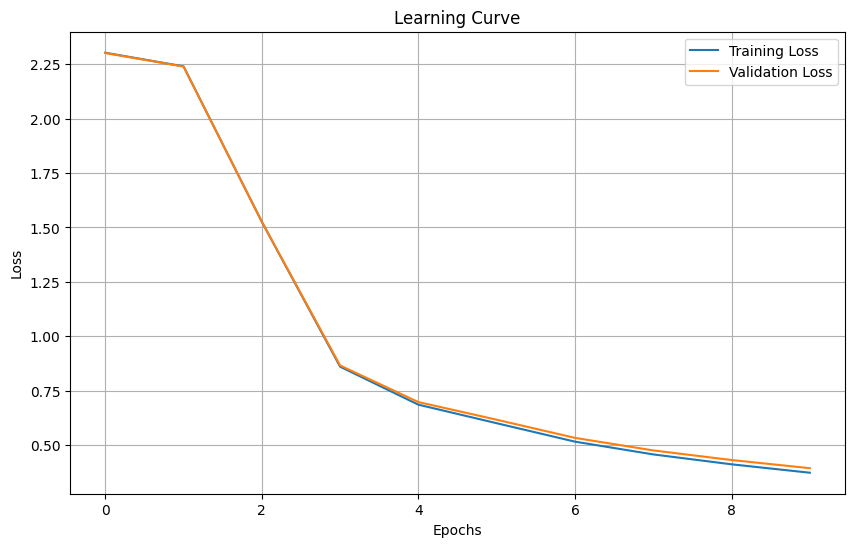

In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)

def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t * np.log(y + delta)) / y.shape[0]

class ScratchSimpleNeuralNetworkClassifier():
    """
    Simple three-layer neural network classifier
    """

    def __init__(self, n_features=784, n_nodes1=400, n_nodes2=200, n_output=10, sigma=0.01, learning_rate=0.01, verbose=True):
        self.verbose = verbose
        self.n_features = n_features
        self.n_nodes1 = n_nodes1
        self.n_nodes2 = n_nodes2
        self.n_output = n_output
        self.learning_rate = learning_rate


        self.W1, self.B1 = self.initialize_weights(n_features, n_nodes1, sigma)
        self.W2, self.B2 = self.initialize_weights(n_nodes1, n_nodes2, sigma)
        self.W3, self.B3 = self.initialize_weights(n_nodes2, n_output, sigma)

    def initialize_weights(self, n_input, n_output, sigma):
        W = sigma * np.random.randn(n_input, n_output)
        B = np.zeros(n_output)
        return W, B

    def forward(self, X):
        """
        Perform forward propagation.

        Parameters
        ----------
        X : ndarray, shape (n_samples, n_features)
            Input data

        Returns
        -------
        A1, Z1, A2, Z2, A3, Z3
        """

        A1 = np.dot(X, self.W1) + self.B1
        Z1 = sigmoid(A1)


        A2 = np.dot(Z1, self.W2) + self.B2
        Z2 = sigmoid(A2)


        A3 = np.dot(Z2, self.W3) + self.B3
        Z3 = softmax(A3)

        return A1, Z1, A2, Z2, A3, Z3

    def backward(self, X, y_one_hot, A1, Z1, A2, Z2, A3, Z3):
        """
        Perform backward propagation.

        Parameters
        ----------
        X : ndarray, shape (n_samples, n_features)
            Input data
        y_one_hot : ndarray, shape (n_samples, n_output)
            One-hot encoded true labels
        A1, Z1, A2, Z2, A3, Z3 : Output of forward propagation

        Returns
        -------
        gradients : dict
            Dictionary containing gradients for W1, B1, W2, B2, W3, B3
        """
        batch_size = X.shape[0]


        dA3 = (Z3 - y_one_hot) / batch_size
        dB3 = np.sum(dA3, axis=0)
        dW3 = np.dot(Z2.T, dA3)
        dZ2 = np.dot(dA3, self.W3.T)


        dA2 = dZ2 * Z2 * (1 - Z2)
        dB2 = np.sum(dA2, axis=0)
        dW2 = np.dot(Z1.T, dA2)
        dZ1 = np.dot(dA2, self.W2.T)


        dA1 = dZ1 * Z1 * (1 - Z1)
        dB1 = np.sum(dA1, axis=0)
        dW1 = np.dot(X.T, dA1)

        gradients = {
            'dW1': dW1, 'dB1': dB1,
            'dW2': dW2, 'dB2': dB2,
            'dW3': dW3, 'dB3': dB3
        }

        return gradients

    def update_weights(self, gradients):
        """
        Update weights and biases using gradients.

        Parameters
        ----------
        gradients : dict
            Dictionary containing gradients for W1, B1, W2, B2, W3, B3
        """
        self.W1 -= self.learning_rate * gradients['dW1']
        self.B1 -= self.learning_rate * gradients['dB1']
        self.W2 -= self.learning_rate * gradients['dW2']
        self.B2 -= self.learning_rate * gradients['dB2']
        self.W3 -= self.learning_rate * gradients['dW3']
        self.B3 -= self.learning_rate * gradients['dB3']

    def fit(self, X_train, y_train, X_val, y_val, epochs=10, batch_size=20):
        """
        Train the neural network classifier.

        Parameters
        ----------
        X_train : ndarray, shape (n_samples, n_features)
            Training data features
        y_train : ndarray, shape (n_samples,)
            Training data labels
        X_val : ndarray, shape (n_samples, n_features)
            Validation data features
        y_val : ndarray, shape (n_samples,)
            Validation data labels
        epochs : int
            Number of epochs for training
        batch_size : int
            Batch size for mini-batch gradient descent
        """

        from sklearn.preprocessing import OneHotEncoder
        one_hot = OneHotEncoder(sparse=False)
        y_train_one_hot = one_hot.fit_transform(y_train.to_numpy().reshape(-1, 1))
        y_val_one_hot = one_hot.transform(y_val.to_numpy().reshape(-1, 1))

        self.train_losses = []
        self.val_losses = []

        for epoch in range(epochs):

            for i in range(0, X_train.shape[0], batch_size):
                X_batch = X_train[i:i + batch_size]
                y_batch = y_train_one_hot[i:i + batch_size]


                A1, Z1, A2, Z2, A3, Z3 = self.forward(X_batch)


                gradients = self.backward(X_batch, y_batch, A1, Z1, A2, Z2, A3, Z3)


                self.update_weights(gradients)


            _, _, _, _, _, Z3_train = self.forward(X_train)
            train_loss = cross_entropy_error(Z3_train, y_train_one_hot)
            self.train_losses.append(train_loss)


            _, _, _, _, _, Z3_val = self.forward(X_val)
            val_loss = cross_entropy_error(Z3_val, y_val_one_hot)
            self.val_losses.append(val_loss)

            if self.verbose:
                print(f'Epoch {epoch + 1}, Train Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}')

    def predict(self, X):
        """
        Estimate using a neural network classifier.

        Parameters
        ----------
        X : ndarray, shape (n_samples, n_features)
            Input data

        Returns
        -------
        y_pred : ndarray, shape (n_samples,)
            Predicted labels
        """
        _, _, _, _, _, Z3 = self.forward(X)
        y_pred = np.argmax(Z3, axis=1)
        return y_pred

    def plot_learning_curve(self):
        """
        Plot the learning curve.
        """
        plt.figure(figsize=(10, 6))
        plt.plot(self.train_losses, label='Training Loss')
        plt.plot(self.val_losses, label='Validation Loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.title('Learning Curve')
        plt.legend()
        plt.grid(True)
        plt.show()

mnist = fetch_openml('mnist_784', version=1)
X = mnist.data
y = mnist.target.astype(int)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

nn = ScratchSimpleNeuralNetworkClassifier(n_features=784, n_nodes1=400, n_nodes2=200, n_output=10, learning_rate=0.01, verbose=True)

nn.fit(X_train, y_train, X_val, y_val, epochs=10, batch_size=20)

y_pred = nn.predict(X_val)

accuracy = accuracy_score(y_val, y_pred)
print(f'Accuracy: {accuracy:.4f}')

nn.plot_learning_curve()